<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [16]:
!pip install matplotlib

In [17]:
!pip install seaborn
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [18]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-11-24 07:07:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  25.7MB/s    in 5.3s    

2025-11-24 07:08:03 (28.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [19]:
#check unique value
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique ConvertedCompYearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())


There are 6113 unique ConvertedCompYearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


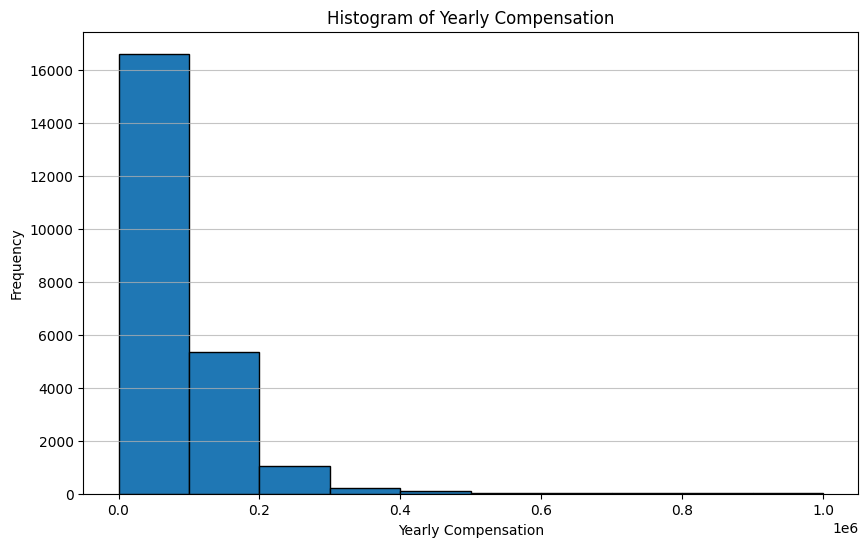

In [20]:
#drop rows with NaN in 'CompTotal'
df.dropna(subset=['ConvertedCompYearly'], inplace=True)

#plot the histogram
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
plt.figure(figsize=(10, 6))
df['ConvertedCompYearly'].plot(kind='hist', bins=bins, edgecolor='black')
plt.title('Histogram of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



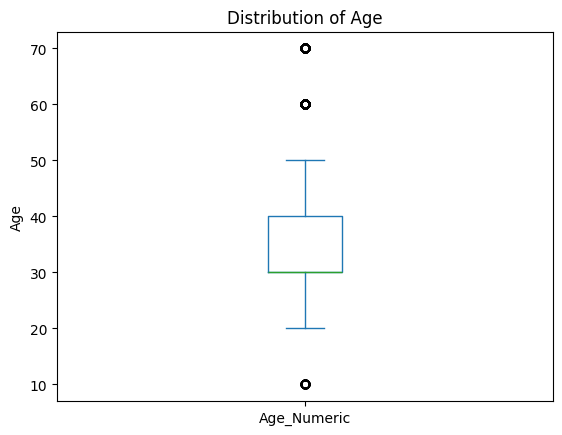

In [21]:
#Map the 'Age' column to approximate numeric values
#If 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#This can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#Drop rows with NaN in 'Age' for clean plotting (optional, depending on data)
df.dropna(subset=['Age_Numeric'], inplace=True)

#using DataFrame.plot.box() for a single column
df['Age_Numeric'].plot.box(title='Distribution of Age')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



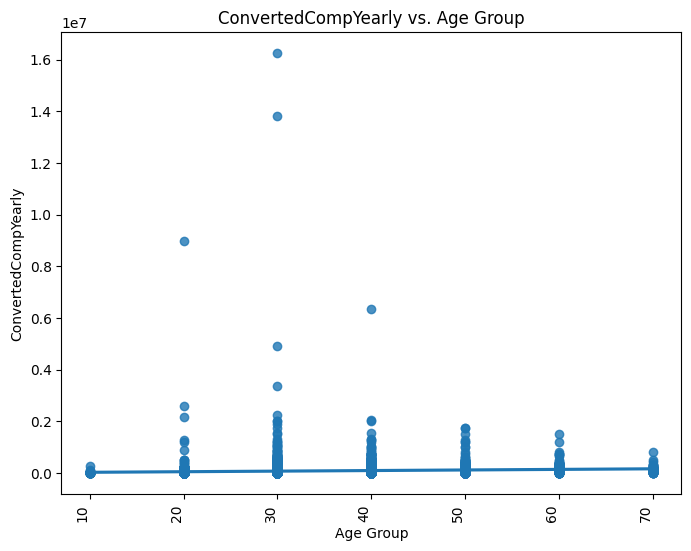

In [23]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#Drop rows with NaN in 'Age' for clean plotting (optional, depending on data)
df.dropna(subset=['Age_Numeric', 'ConvertedCompYearly'], inplace=True)

#Create the categorical scatter plot
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.regplot(data=df, x='Age_Numeric', y='ConvertedCompYearly')
plt.title('ConvertedCompYearly vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('ConvertedCompYearly')
plt.xticks(rotation=90, ha='right')
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


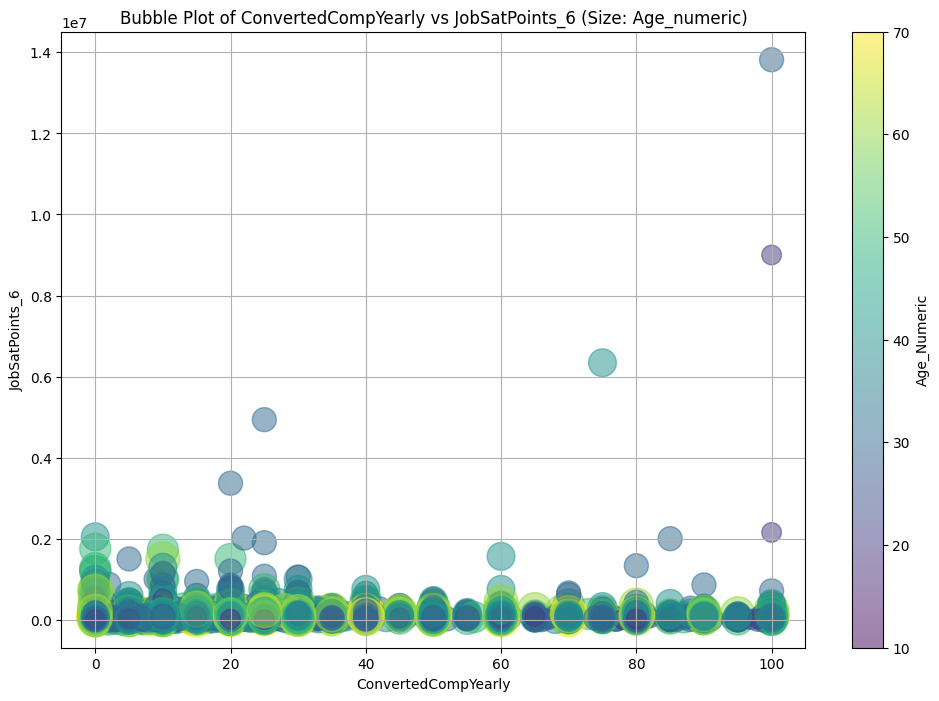

In [26]:
#Scale the Age_Numeric values for visibility; adjust the multiplier (10) as needed
size_scale = 10
sizes = df['Age_Numeric'] * size_scale

plt.figure(figsize=(12, 8))
plt.scatter(
    x=df['JobSatPoints_6'],
    y=df['ConvertedCompYearly'],
    s=sizes,
    alpha=0.5,
    c=df['Age_Numeric'], # Color by age for better visualization
    cmap='viridis' # Color map style
)

#Adding plot details
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.title('Bubble Plot of ConvertedCompYearly vs JobSatPoints_6 (Size: Age_numeric)')
plt.colorbar(label='Age_Numeric')
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [27]:
#Check unique value
print('\nThere are', df['MainBranch'].nunique(), 'unique MainBranch values in the survey:')
print(df['MainBranch'].value_counts())


There are 2 unique MainBranch values in the survey:
MainBranch
I am a developer by profession                                                           21540
I am not primarily a developer, but I write code sometimes as part of my work/studies     1886
Name: count, dtype: int64


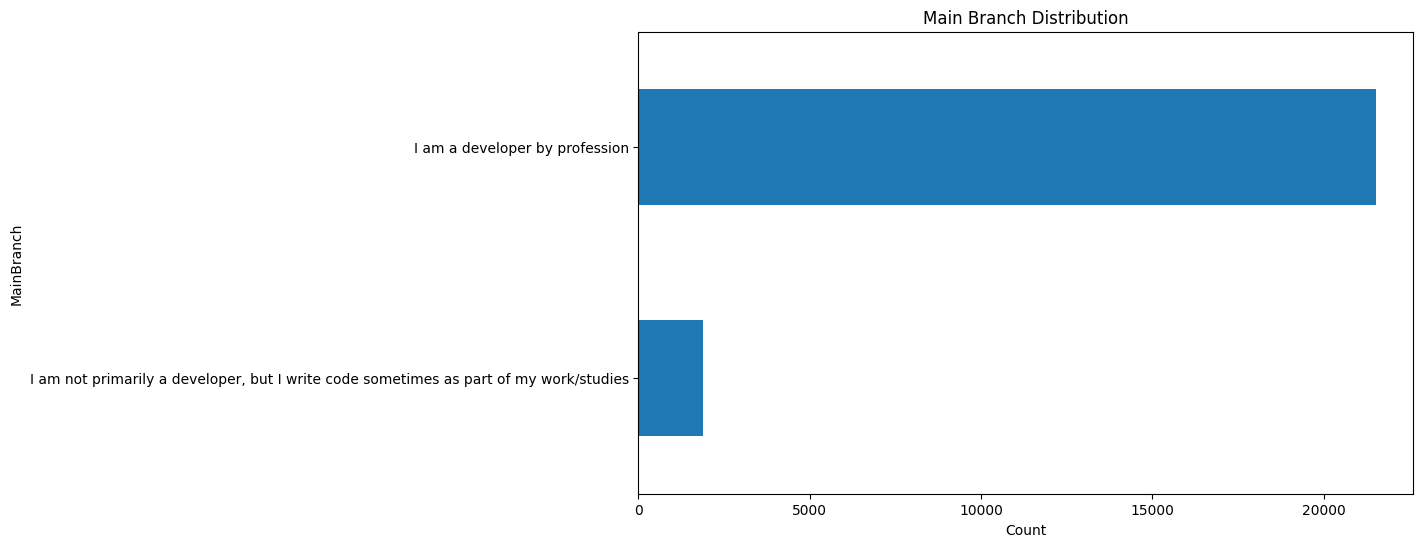

In [29]:
#Calculate the distribution (value counts)
#The result is a Series where the index is the branch name and the value is its count
branch_distribution = df['MainBranch'].value_counts()

#Plot the horizontal bar chart
ax = branch_distribution.plot(kind='barh', figsize=(10, 6), title='Main Branch Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('MainBranch')
plt.gca().invert_yaxis() # Invert y-axis to have the most frequent at the top, if desired
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [30]:
#Check unique value
print('\nThere are', df['LanguageWantToWorkWith'].nunique(), 'unique LanguageWantToWorkWith values in the survey:')
print(df['LanguageWantToWorkWith'].value_counts())


There are 10157 unique LanguageWantToWorkWith values in the survey:
LanguageWantToWorkWith
Rust                                                        330
Python                                                      289
HTML/CSS;JavaScript;TypeScript                              274
C#                                                          223
Go                                                          200
                                                           ... 
C;Elixir;GDScript;Go;HTML/CSS;Kotlin;Rust;TypeScript;Zig      1
Bash/Shell (all shells);Elixir;Go;HTML/CSS;SQL;Zig            1
Fortran;JavaScript;R                                          1
Dart;Go;HTML/CSS;JavaScript;PHP;Rust;Solidity;SQL             1
Dart;Elixir;Java;Rust                                         1
Name: count, Length: 10157, dtype: int64


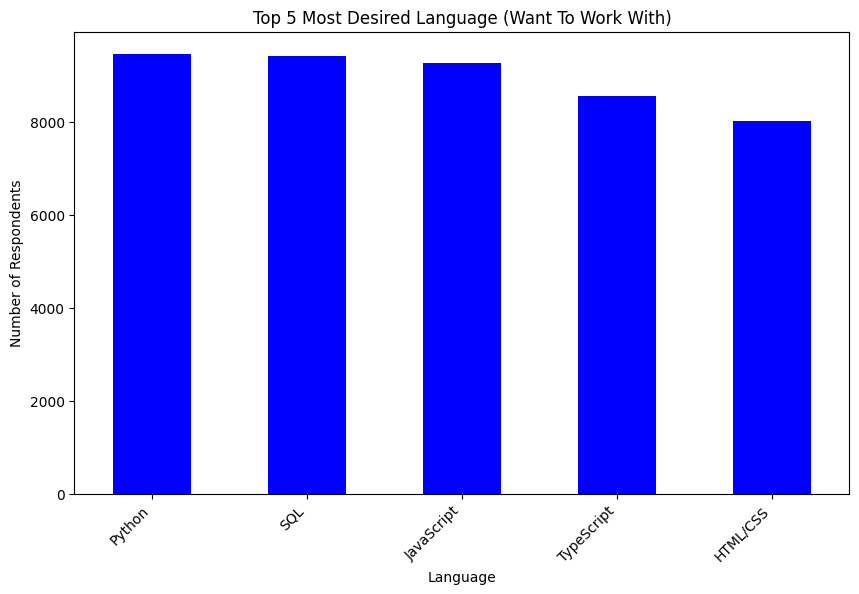

In [33]:
#If the data is collected as semi-colon separated strings in a single column (common in SO surveys),
#We will need to split and explode the entries first to count individual databases.
#Example if entries look like: 'Fortran;JavaScript;R'
if df['LanguageWantToWorkWith'].dtype == 'object' and df['LanguageWantToWorkWith'].str.contains(';').any():
    df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')
    df = df.explode('LanguageWantToWorkWith')
    # Strip any potential leading/trailing whitespace after splitting
    df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.strip()


#Count the occurrences of each database
# value_counts() is the simplest way to count unique values in a Series
language_counts = df['LanguageWantToWorkWith'].value_counts()

#Optional: Select the top N databases for clarity
top_n = 5
top_language = language_counts.head(top_n)

#Plot the data as a bar chart
plt.figure(figsize=(10, 6))
top_language.plot(kind='bar', color='blue')

plt.title(f'Top {top_n} Most Desired Language (Want To Work With)')
plt.xlabel('Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


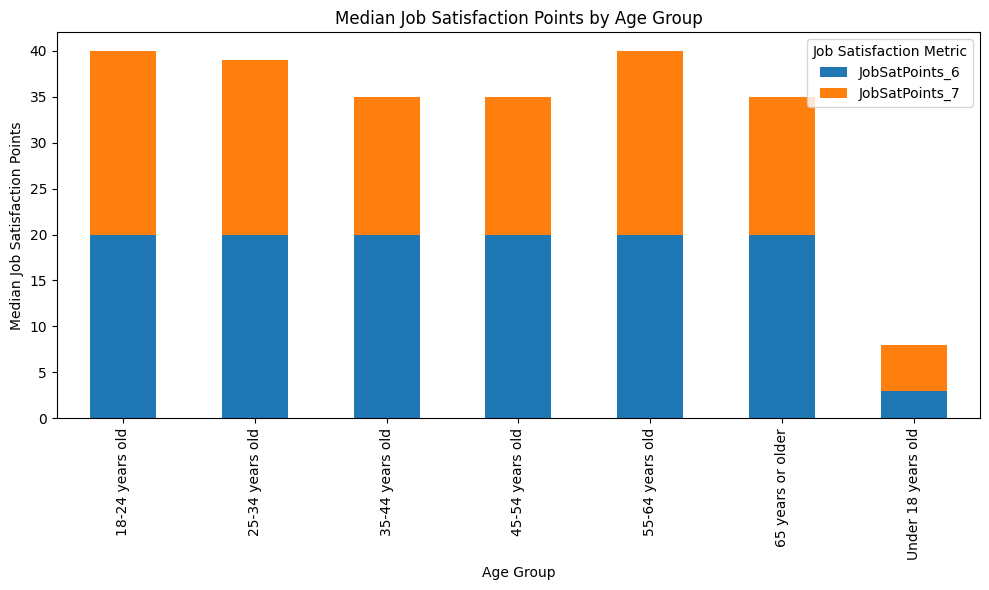

In [34]:
#calculate median
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

#create stacked chart
median_job_sat.plot.bar(stacked=True, figsize=(10, 6))
plt.title('Median Job Satisfaction Points by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=90) 
plt.legend(title='Job Satisfaction Metric')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



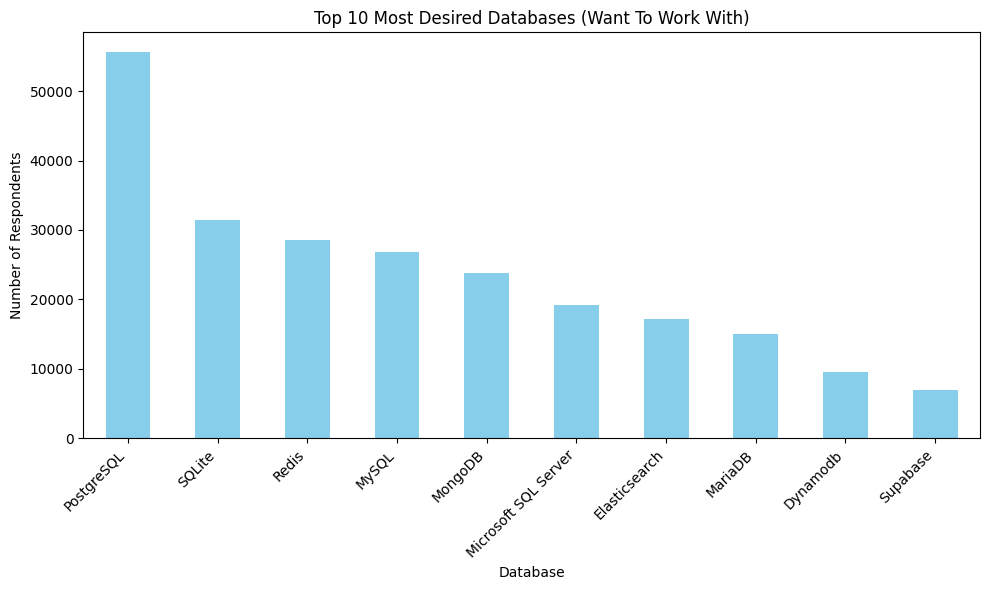

In [35]:
#If the data is collected as semi-colon separated strings in a single column (common in SO surveys),
#We will need to split and explode the entries first to count individual databases.
#Example if entries look like: 'MySQL;PostgreSQL'
if df['DatabaseWantToWorkWith'].dtype == 'object' and df['DatabaseWantToWorkWith'].str.contains(';').any():
    df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
    df = df.explode('DatabaseWantToWorkWith')
    # Strip any potential leading/trailing whitespace after splitting
    df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.strip()


#Count the occurrences of each database
#value_counts() is the simplest way to count unique values in a Series
database_counts = df['DatabaseWantToWorkWith'].value_counts()

#Optional: Select the top N databases for clarity
top_n = 10
top_databases = database_counts.head(top_n)

#Plot the data as a bar chart
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
top_databases.plot(kind='bar', color='skyblue')

#Add labels and title
plt.title(f'Top {top_n} Most Desired Databases (Want To Work With)')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to not cut off labels
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_1358/1929587663.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_by_age = df.groupby('Age')['ConvertedCompYearly'].median().sort_index()


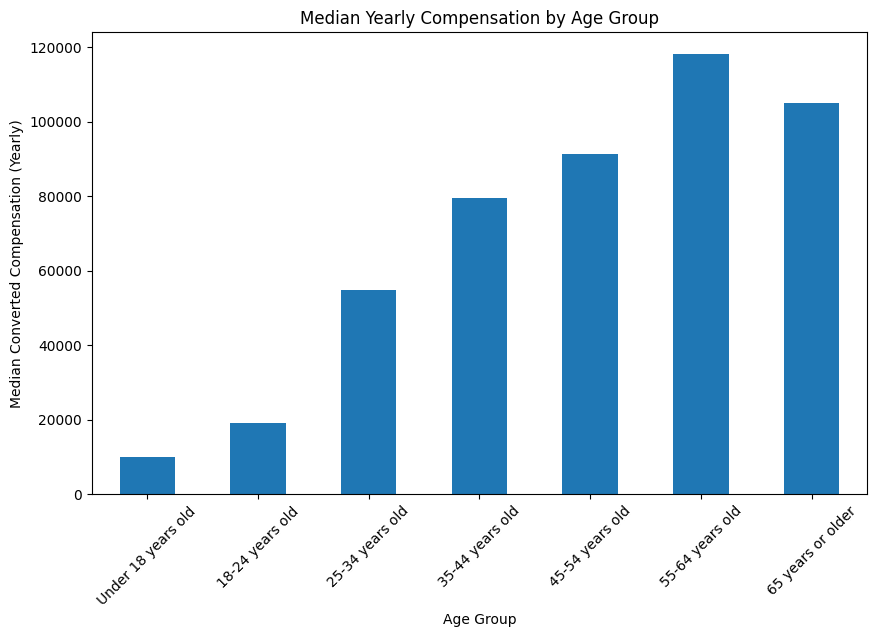

In [40]:
#Ensure 'Age' is treated as a categorical variable and ordered if desired
#For example, if you want a specific order for age groups:
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True) 

#Aggregate the data
median_comp_by_age = df.groupby('Age')['ConvertedCompYearly'].median().sort_index()

#Plot the bar chart
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size
median_comp_by_age.plot.bar()
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



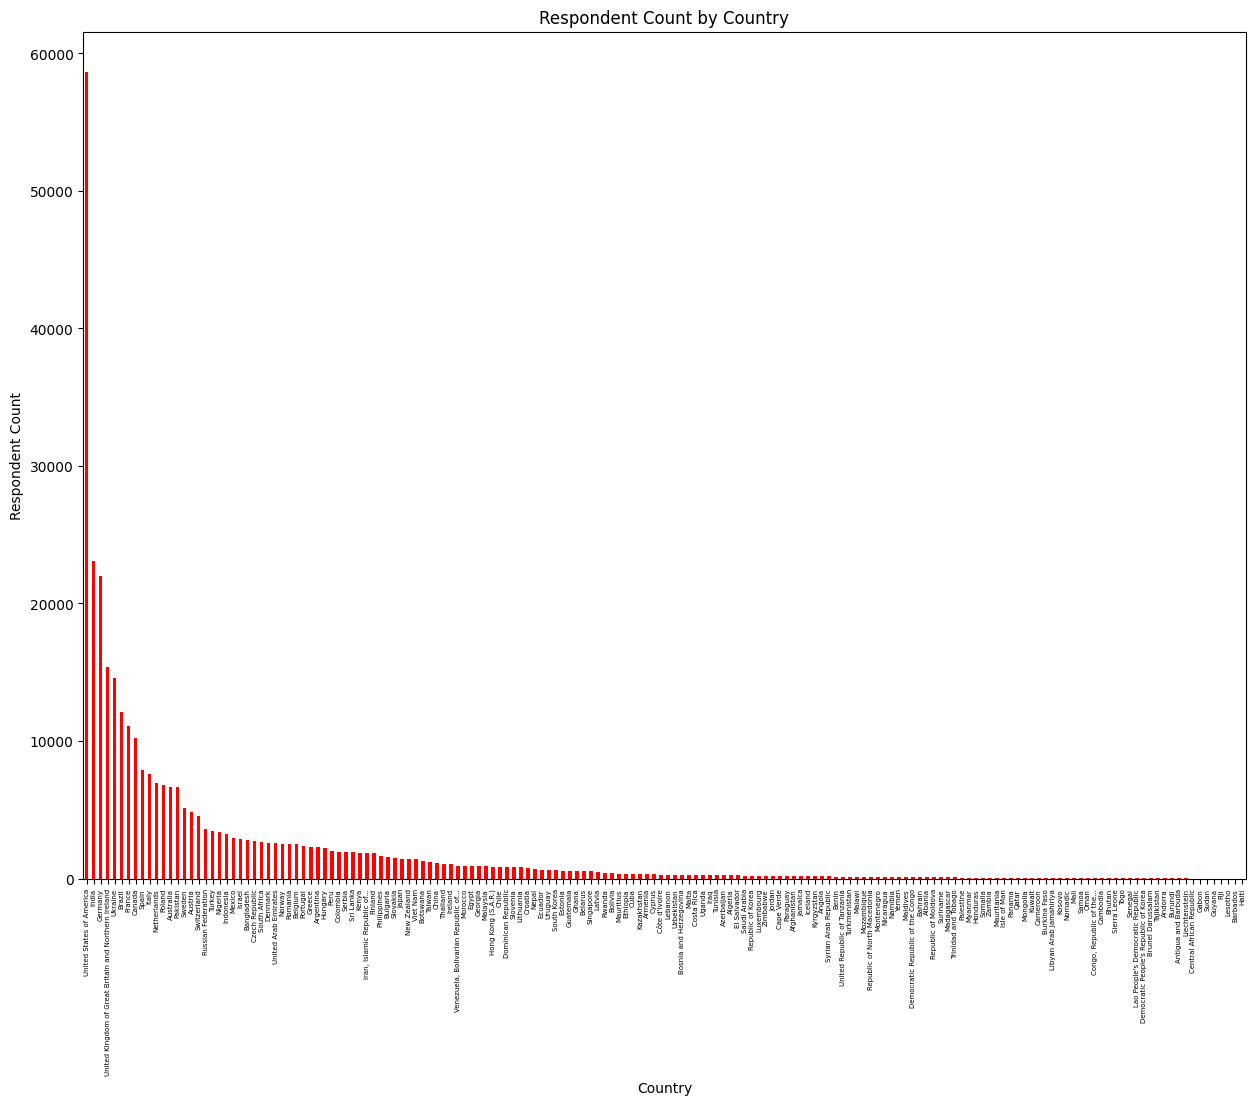

In [49]:
#Calculate the distribution (value counts)
#The result is a Series where the index is the Country name and the value is its count
country_count = df['Country'].value_counts()

#Plot  bar chart
plt.figure(figsize=(15, 11))
country_counts.plot(kind='bar', color='red')
plt.title('Respondent Count by Country')
plt.xlabel('Country')
plt.ylabel('Respondent Count')
plt.xticks(rotation=90, fontsize=5)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
